---
# <mark> Part 1 </mark>
# `Data Preprocessing`


----

<StemContainer object of 3 artists>

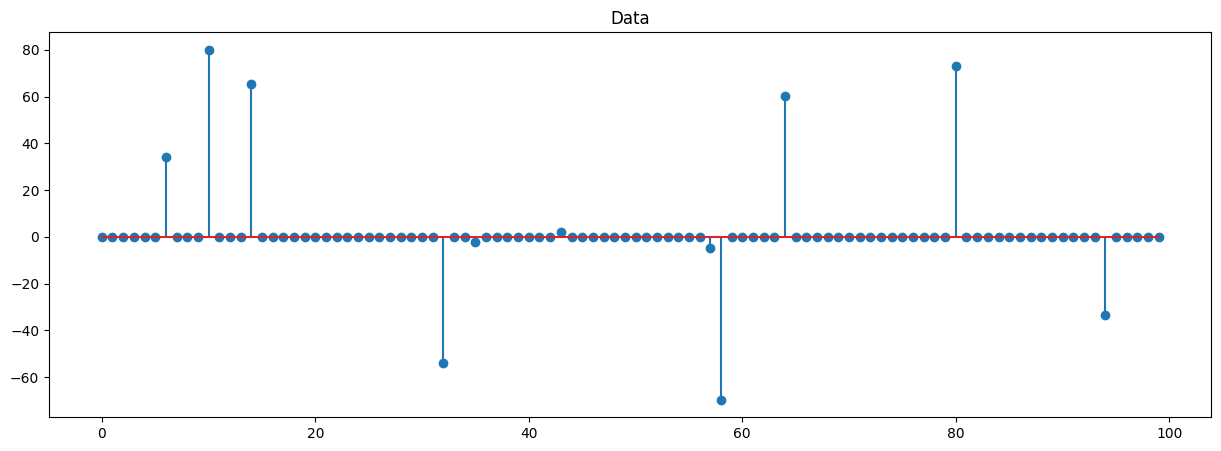

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200397 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


## Normalization using sklearn

In [2]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

signal_1 = max_abs_scaler.fit_transform(signal)  # This is the Maxabs scaler 


## Defining MinMaxScaler and Standard scaler functions

In [3]:
def min_max_scale_function(data):
    min_val = np.min(data)
    max_val = np.max(data)
    data = (data-min_val)/(max_val-min_val)
    return data

def standard_scaler_function(data):
    miu = np.mean(data)
    stdiv = np.std(data)
    return (data-miu)/stdiv

signal_2 = min_max_scale_function(signal) 
signal_3 = standard_scaler_function(signal)


## Visualize Data


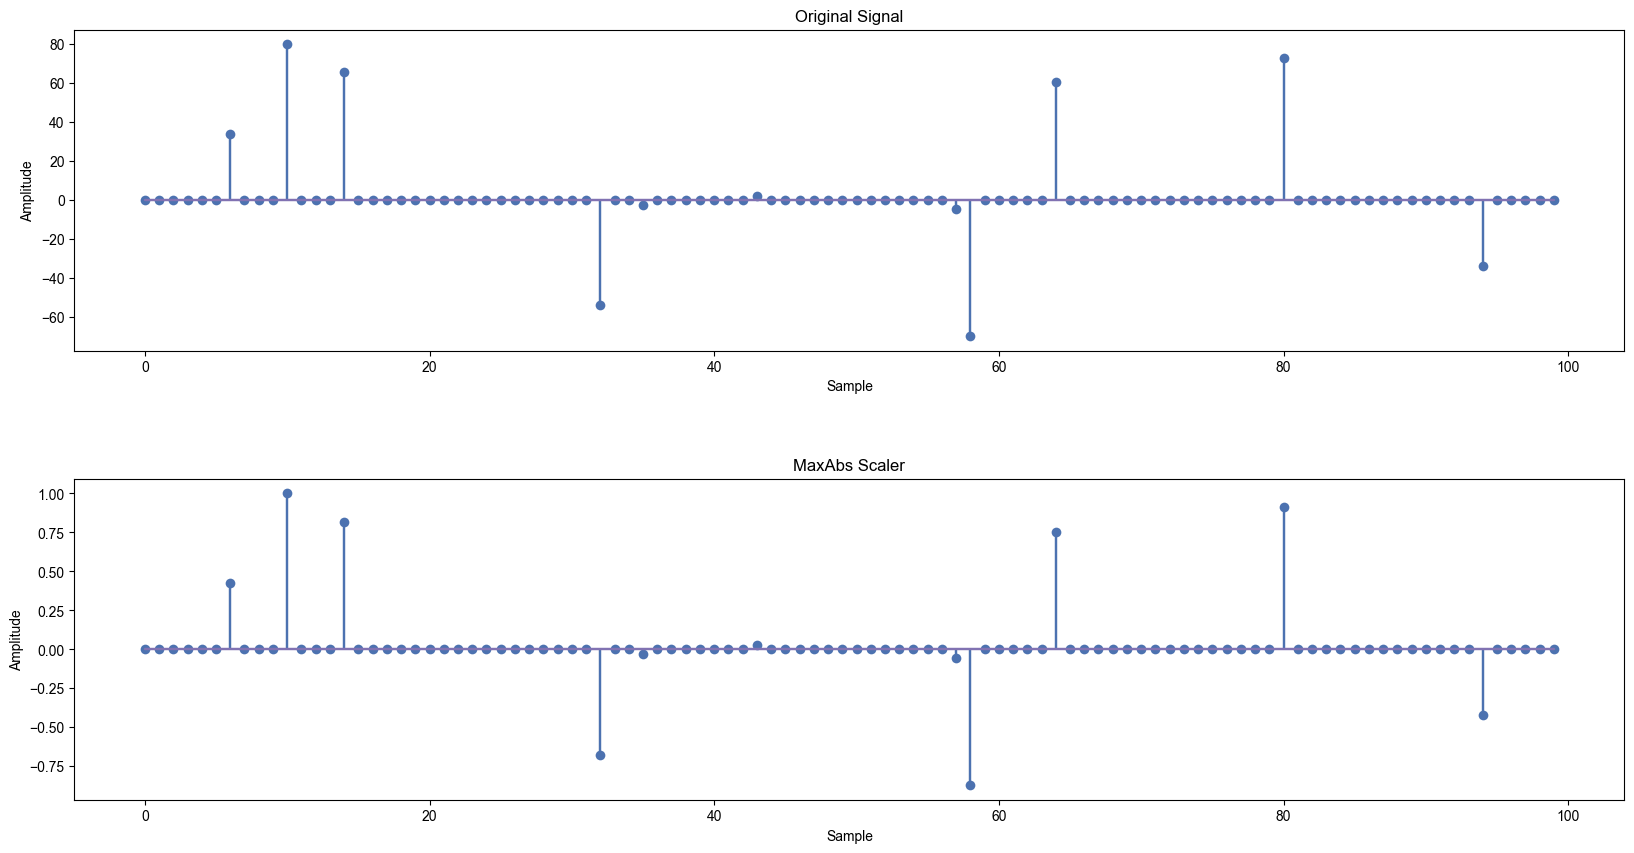

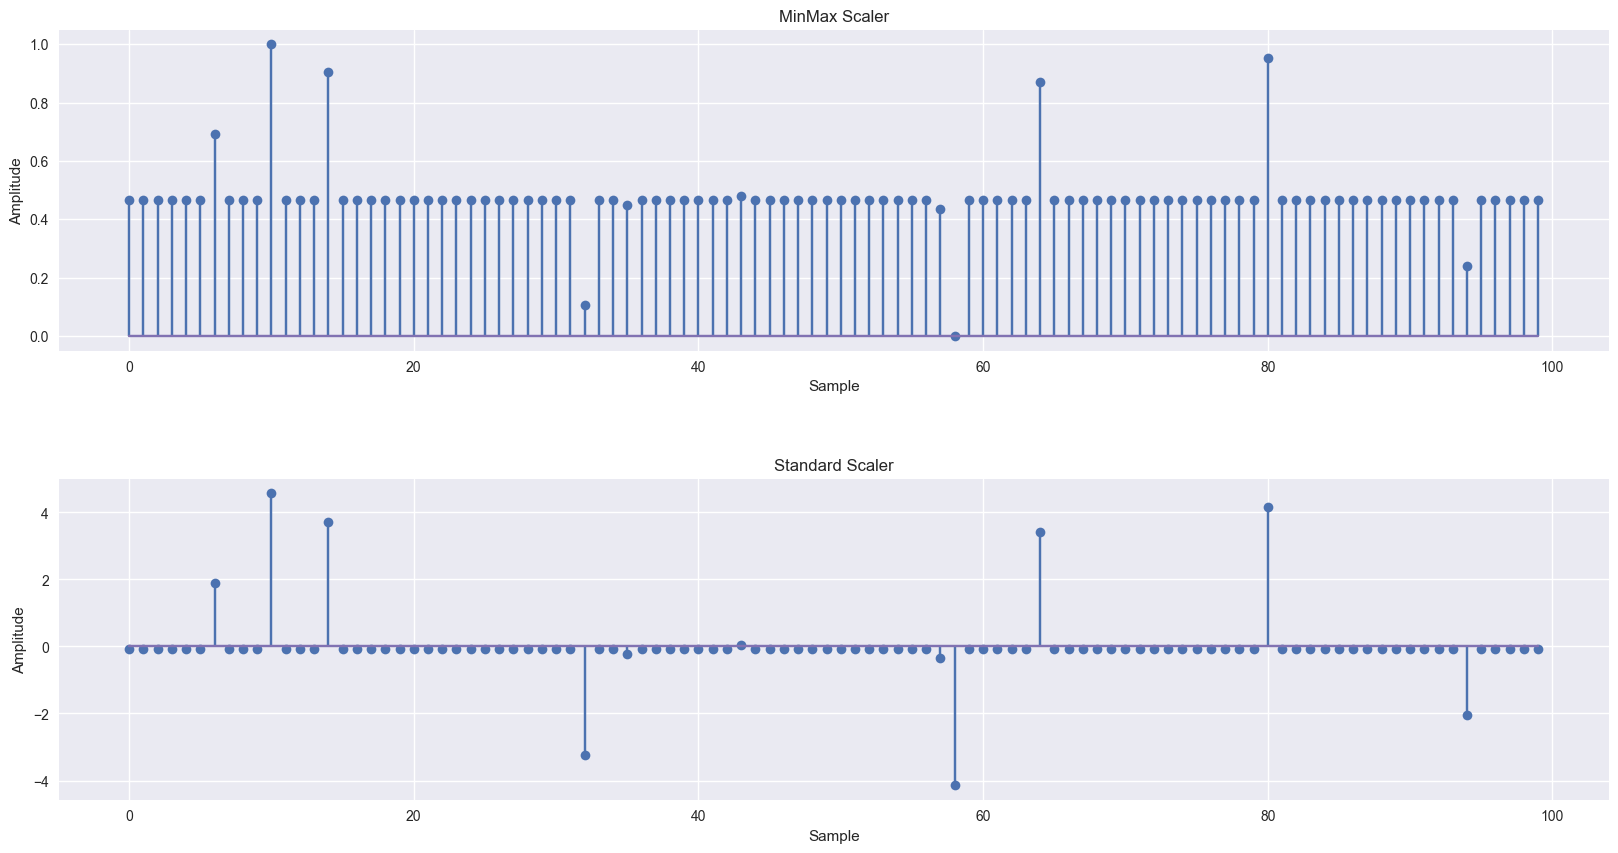

In [4]:
%matplotlib inline
# Plot Stem Plots
fig,ax = plt.subplots(2,1,figsize=(20,10))
#adjust the gap between subplots
plt.subplots_adjust(hspace = 0.4)
plt.style.use('seaborn-v0_8')

# Original Signal
ax[0].stem(signal)
ax[0].set_title('Original Signal')
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Amplitude')

# MaxAbs Scaler
ax[1].stem(signal_1)
ax[1].set_title('MaxAbs Scaler')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Amplitude')
plt.show()

fig,ax = plt.subplots(2,1,figsize=(20,10))
#adjust the gap between subplots
plt.subplots_adjust(hspace = 0.4)
plt.style.use('seaborn-v0_8')

# MinMax Scaler
ax[0].stem(signal_2)
ax[0].set_title('MinMax Scaler')
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Amplitude')

#Standard Scaler
ax[1].stem(signal_3)
ax[1].set_title('Standard Scaler')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Amplitude')

plt.show()




#### finding Non Zero values before and after normalization

In [5]:
print("Non Zero Elements of the Signal (Before Normalization): ",np.count_nonzero(signal),sep='\t')
print("Non Zero Elements of the Signal (After MaxAbs Normalization): ",np.count_nonzero(signal_1),sep='\t')
print("Non Zero Elements of the Signal (After MinMax Normalization): ",np.count_nonzero(signal_2),sep='\t')
print("Non Zero Elements of the Signal (After Standard Normalization): ",np.count_nonzero(signal_3))



Non Zero Elements of the Signal (Before Normalization): 	11
Non Zero Elements of the Signal (After MaxAbs Normalization): 	11
Non Zero Elements of the Signal (After MinMax Normalization): 	99
Non Zero Elements of the Signal (After Standard Normalization):  100


---

# <mark> Part 2 </mark>
# `Linear Regression on real world data`
--- 

Reading the data from the file

In [6]:
#Load the CSV file
import numpy as np
import pandas as pd

df = pd.read_csv("Advertising.csv")
df.head()

,sample index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Data split and co-effiecient calculation

In [7]:
# Split the data 20% for testing assuming sales being the traget variable
from sklearn.model_selection import train_test_split
names_of_column_names = df.columns[1:-1]
X = df[names_of_column_names]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

print("Co-efficients corresponding to independent variables")
print("----------------------------------------------------")
print(f"{names_of_column_names[0]}\t\t:\t{model.coef_[0]}")
print(f"{names_of_column_names[1]}\t\t:\t{model.coef_[1]}")
print(f"{names_of_column_names[2]}\t:\t{model.coef_[2]}")
print(f"Intercept \t:\t{model.intercept_}")


Co-efficients corresponding to independent variables
----------------------------------------------------
TV		:	0.044729517468716326
radio		:	0.18919505423437652
newspaper	:	0.0027611143413671935
Intercept 	:	2.979067338122629


calculating performance metrics

In [8]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

y_test_predicted = model.predict(X_test)


# Residual sum of squares (RSS)
RSS = np.sum((y_test_predicted-y_test)**2)
# Residual Standard Error (RSE)
N=len(y_test)
d=(len(model.coef_)+1) # including interecept      
RSE = np.sqrt (RSS/(N-d))
#Mean Squared Error
MSE = mean_squared_error(y_test,y_test_predicted)
#R2 Score
R2 = r2_score(y_test,y_test_predicted)
#creating ols model
ols_model = sm.OLS(y_train,X_train).fit()
#Standard Error (SE)
params = ols_model.params
SE = ols_model.bse
#T-Statistics
t_values = ols_model.tvalues
#P-Values
p_values = ols_model.pvalues


#print the results

print("_"*50)
print(f"RSE\t\t:\t{RSE}")
print(f"MSE\t\t:\t{MSE}")
print(f"R2\t\t:\t{R2}")
print("_"*50)
print("Standard Error (SE) for each feature")
print("--------------------------------------------------")
print(f"{names_of_column_names[0]}\t\t:\t{SE[0]}")
print(f"{names_of_column_names[1]}\t\t:\t{SE[1]}")
print(f"{names_of_column_names[2]}\t:\t{SE[2]}")

print("_"*50)
print("T-Statistics for each feature")
print("--------------------------------------------------")
print(f"{names_of_column_names[0]}\t\t:\t{t_values[0]}")
print(f"{names_of_column_names[1]}\t\t:\t{t_values[1]}")
print(f"{names_of_column_names[2]}\t:\t{t_values[2]}")

print("_"*50)
print("P-Values for each feature")
print("--------------------------------------------------")
print(f"{names_of_column_names[0]}\t\t:\t{p_values[0]}")
print(f"{names_of_column_names[1]}\t\t:\t{p_values[1]}")
print(f"{names_of_column_names[2]}\t:\t{p_values[2]}")




__________________________________________________
RSE		:	1.8779709363435915
MSE		:	3.1740973539761033
R2		:	0.899438024100912
__________________________________________________
Standard Error (SE) for each feature
--------------------------------------------------
TV		:	0.0014563733599258976
radio		:	0.010864334024725128
newspaper	:	0.007922459304137928
__________________________________________________
T-Statistics for each feature
--------------------------------------------------
TV		:	36.466716506203646
radio		:	20.138066864833657
newspaper	:	3.01108835995514
__________________________________________________
P-Values for each feature
--------------------------------------------------
TV		:	1.5241085751107518e-78
radio		:	2.3135664129241866e-45
newspaper	:	0.0030344754530055016


Finding the  most suitable way for advertising

In [33]:
# x = ["TV","Radio","Newspaper"]
x_test_cases = np.array([
    [50_000,0,0],
    [0,50_000,0],
    [25_000,25_000,0]
    ])

y_test_cases = np.array([model.predict([x_test_case]) for x_test_case in x_test_cases])

for i in range(len(x_test_cases)):
    print(f"Predicted Sales for {x_test_cases[i]} is {y_test_cases[i]}")



Predicted Sales for [50000     0     0] is [2239.45494077]
Predicted Sales for [    0 50000     0] is [9462.73177906]
Predicted Sales for [25000 25000     0] is [5851.09335992]


C:\Users\Dojitha Mirihagalla\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dojitha Mirihagalla\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dojitha Mirihagalla\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---
## <mark>Part 3 </mark>
#  `Impact on Outliers`
---

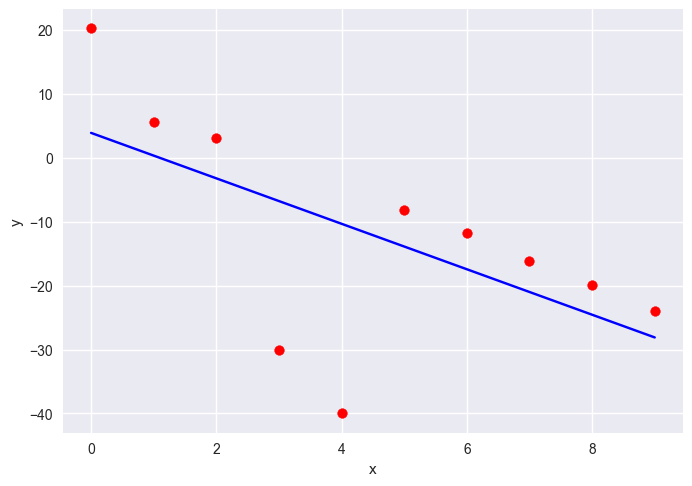

In [35]:

%matplotlib inline
#Linear Regression Impacts on Outliers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Data from the Table
xi = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
yi = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])


# creatinng the linear regression model
model = LinearRegression()

x_train = xi.reshape(-1, 1)
y_train = yi.reshape(-1, 1)

# fitting the data to the model
model.fit(x_train, y_train)

# training data scatter plot
plt.scatter(x_train,y_train,color='red')
plt.xlabel('x')
plt.ylabel('y')

# Plot the linear regression line using coefficients generated
plt.plot(x_train, model.coef_[0][0]*x_train + model.intercept_[0], '-b')

plt.show()

Loss for Model 1: 	0.435416262490386
Loss for Model 2: 	0.9728470518681676


Text(0, 0.5, 'y')

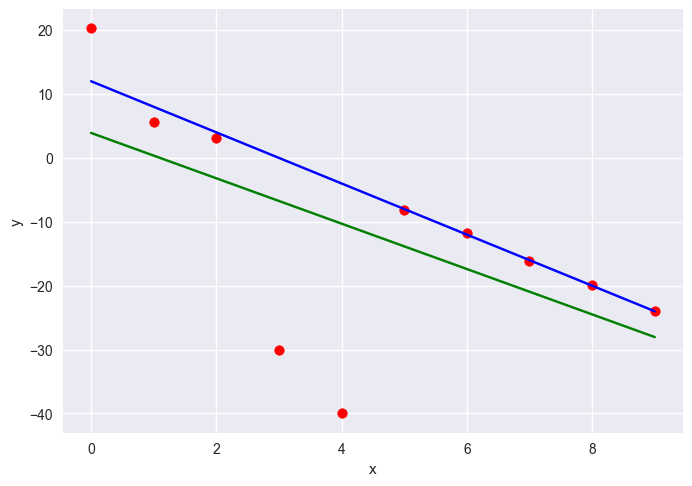

In [47]:
# Model 1: y = −4x+12
# Model 2: y = −3.55x+3.91

y1 = -4*x_train + 12
y2 = -3.55*x_train + 3.91

# Loss function
def loss(y, y_pred,N=10,beta=1):
    numerator = (y-y_pred)**2
    denominator = (y-y_pred)**2 + beta**2
    return np.sum(numerator/denominator)/N

# Loss for Model 1
print("Loss for Model 1: ",loss(y_train,y1),sep='\t')
print("Loss for Model 2: ",loss(y_train,y2),sep='\t')

# Plot the linear regression line using coefficients generated
plt.scatter(x_train,y_train,color='red',label='Data')
plt.plot(x_train, -4*x_train + 12, '-b',label='Model 1')
plt.plot(x_train, -3.55*x_train + 3.91, '-g',label='Model 2')
plt.xlabel('x')
plt.ylabel('y')

